In [6]:

import pandas as pd
import numpy as np

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB


from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import re

In [7]:
df = pd.read_csv('./data/drug_reviews_cleaned.csv')

In [8]:
df.head()

,User_ID,drugName,condition,review,rating,date,usefulCount,ratings_simplified
0,164952,Phentermine / topiramate,Weight Loss,"""I have been on the Qysmia for 3 weeks now. I...",8.0,"December 25, 2015",38,3
1,145900,Qsymia,Weight Loss,"""My Dr agreed to over see putting me on Qsymia...",9.0,"February 24, 2013",46,4
2,52117,Adipex-P,Weight Loss,"""I just started Adipex-P 37.5mg on March 6th, ...",8.0,"March 10, 2011",7,3
3,145785,Qsymia,Weight Loss,"""Began taking Qsymia 3.75 in June 2013. Its on...",10.0,"May 26, 2014",61,4
4,145840,Qsymia,Weight Loss,"""Made me jittery and could not sleep. Lost wei...",1.0,"August 21, 2013",59,1


In [9]:
df.isnull().sum()

User_ID               0
drugName              0
condition             0
review                0
rating                0
date                  0
usefulCount           0
ratings_simplified    0
dtype: int64

In [10]:
df.dtypes

User_ID                 int64
drugName               object
condition              object
review                 object
rating                float64
date                   object
usefulCount             int64
ratings_simplified      int64
dtype: object

In [11]:
df.describe()

,User_ID,rating,usefulCount,ratings_simplified
count,3609.000000,3609.000000,3609.000000,3609.000000
mean,96869.776392,8.051261,38.751455,3.321696
std,52132.118548,2.760864,45.854997,1.040679
min,4248.000000,1.000000,0.000000,1.000000
25%,54425.000000,7.000000,12.000000,3.000000
50%,127494.000000,9.000000,24.000000,4.000000
75%,138761.000000,10.000000,50.000000,4.000000
max,219296.000000,10.000000,796.000000,4.000000


In [12]:
df.duplicated().sum()

0

In [13]:
df.eq(0).sum()

User_ID                0
drugName               0
condition              0
review                 0
rating                 0
date                   0
usefulCount           39
ratings_simplified     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   User_ID             3609 non-null   int64  
 1   drugName            3609 non-null   object 
 2   condition           3609 non-null   object 
 3   review              3609 non-null   object 
 4   rating              3609 non-null   float64
 5   date                3609 non-null   object 
 6   usefulCount         3609 non-null   int64  
 7   ratings_simplified  3609 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 225.7+ KB


In [15]:
df.shape

(3609, 8)

In [17]:
df['review'].head(10)

0    "I have been on the Qysmia for 3 weeks now.  I...
1    "My Dr agreed to over see putting me on Qsymia...
2    "I just started Adipex-P 37.5mg on March 6th, ...
3    "Began taking Qsymia 3.75 in June 2013. Its on...
4    "Made me jittery and could not sleep. Lost wei...
5    "I am a 28 year old female and my highest weig...
6    "I have been on Contrave for 3 weeks. I am 5&q...
7    "I was signed up to have the gastric sleeve pr...
8    "Let me start by saying I am 59 years old. Unt...
9    "I started 5/14/15 and after schpeel from my d...
Name: review, dtype: object

## Cleaning

In [16]:
df['date'] = pd.to_datetime(df['date'])

## text processing

In [ ]:
# stop_words = set(stopwords.words('english'))
# ps = PorterStemmer()

In [ ]:
# # Instantiate a CountVectorizer.
# cvec = CountVectorizer()

## modeling

In [18]:
X = df['review']
y = df['ratings_simplified']

In [19]:
# Check what we need to check in a classification problem.
y.value_counts(normalize = True)

ratings_simplified
4    0.638681
3    0.159601
1    0.115267
2    0.086451
Name: proportion, dtype: float64

In [20]:
#Split the data into the training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.25,
                                                    stratify=y,
                                                    random_state=123)

In [21]:


print('Training')
print(y_train.value_counts(normalize = True))
print('Testing')
print(y_test.value_counts(normalize = True))

Training
ratings_simplified
4    0.638581
3    0.159645
1    0.115299
2    0.086475
Name: proportion, dtype: float64
Testing
ratings_simplified
4    0.638981
3    0.159468
1    0.115172
2    0.086379
Name: proportion, dtype: float64


In [22]:
X[2]

'"I just started Adipex-P 37.5mg on March 6th, 2011. I am in the military and am a single mom of two. I work and go to school full time so its hard for me to work out everyday even though I&#039;m supposed to. I have never really had trouble losing weight until I started working night shift in May. I would only eat one meal a day but since it was late I gained the weight. I am 5&#039;5 and weighed 184lbs before I was put on this pill. The first day I took it was right after the doctors appointment. By 5pm and I had only eaten one piece of ham. I bought a salad after I took the pill and tried to eat it when I got home at 6 and couldn&#039;t because I had no urge to want to eat. It&#039;s Wednesday now and I&#039;ve lost 4lbs already."'

## Pipeline

In [23]:
pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB()),
    # ('svm', SVC(gamma = 'auto'))
    # ('svm', SVC(gamma = 'auto'))
  
])

In [24]:

pipe_params = {
    'cvec__max_features': [500, 1000, 2000, 3000, 4000, 5000], 
    'cvec__min_df': [2, 3,],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1,1), (1,2)],
    # 'svm__C': [0.1, 1, 10],
    # 'svm__c': [.1, 1, 10],
    # 'svm__kernel': ['linear', 'rbf']
}

In [25]:
gs = GridSearchCV(pipe, 
                  param_grid=pipe_params, 
                  cv=5) 

In [26]:
gs.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'cvec__max_df': [0.9, 0.95],
                         'cvec__max_features': [500, 1000, 2000, 3000, 4000,
                                                5000],
                         'cvec__min_df': [2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2)]})

In [27]:
#Best Score
gs.best_score_

0.7546152744337056

In [28]:
#Train set score
gs.score(X_train, y_train)

0.9061345158906134

In [29]:
#Test set score
gs.score(X_test, y_test)

0.7541528239202658

## TF IDF Vectorizer

In [155]:
pipe_tvec = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

In [156]:
pipe_tvec_params = {
    'tvec__max_features': [500, 1000, 2000, 3000, 4000, 5000],
    'tvec__stop_words': [None, 'english'],
    'tvec__ngram_range': [(1,1), (1,2)],
    'nb__a': [.1, 10] #supports niave bayes process
}

In [157]:
# gs_tvec = GridSearchCV(pipe_tvec,
#                        param_grid=pipe_tvec_params,
#                        cv = 5, 
#                        pipe_params_nb)

gs_tvec = GridSearchCV(pipe_tvec, 
                       param_grid={'tvec__max_features': [2000, 3000, 4000, 5000], 
                      'tvec__min_df': [2, 3]},
                       cv=5,
                       scoring='accuracy')

#gs_tvec = GridSearchCV(pipe_tvec, param_grid={'tvec__max_features': [2000, 3000, 4000, 5000], 'tvec__min_df': [2, 3]}, cv=5, scoring='accuracy')



In [159]:
#gs_tvec.best_score_

In [160]:
#Train set score
#gs_tvec.score(X_train, y_train)

In [42]:
#Test set score
gs_tvec.score(X_test, y_test)

0.6500553709856035

## SVM 

In [94]:
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier

In [69]:


# pipe = Pipeline([
#     ('cvec', CountVectorizer()),
#     # ('nb', MultinomialNB()),
#     ('svm', SVC(gamma='auto'))
#     # ('rf', RandomForestClassifier())
#     # ('lr', LogisticRegression())
#     # ('gb', GradientBoostingClassifier())
# ])

pipe_svm = Pipeline([
    ('cvec', CountVectorizer()),  # You can also try TfidfVectorizer here
    ('svm', SVC())
])

In [142]:
# pipe_params_svm = {
#     'cvec__max_features': [500, 1000, 2000, 3000, 4000, 5000], 
#     'cvec__min_df': [2, 3],
#     'cvec__max_df': [0.9, 0.95],
#     'cvec__stop_words' [none]
#     'cvec__ngram_range': [(1, 1), (1, 2)],
#     'svm__C': [0.1, 1, 10],  # You can adjust the values based on your data
#     'svm__kernel': ['linear', 'rbf']
# }

pipe_params_svm = {
    'cvec__max_df': [0.9],
    'cvec__max_features': [5000],
    'cvec__min_df': [2],
    'cvec__ngram_range': [(1, 2)],  # Corrected to use a tuple
    'cvec__stop_words': [None],
    'svm__C': [10],
    'svm__kernel': ['rbf'],
    'svm__gamma': ['scale'],
    'svm__probability': [True]
}



In [143]:
gs_svm = GridSearchCV(pipe_svm, 
                      param_grid=pipe_params_svm, 
                      cv=5)

In [144]:
# Fit GridSearch to training data
gs_svm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('svm', SVC())]),
             param_grid={'cvec__max_df': [0.9], 'cvec__max_features': [5000],
                         'cvec__min_df': [2], 'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': [None], 'svm__C': [10],
                         'svm__gamma': ['scale'], 'svm__kernel': ['rbf'],
                         'svm__probability': [True]})

In [145]:
gs_svm.best_score_

0.7934240950542593

In [146]:
gs_svm.score(X_train, y_train)

0.9977827050997783

In [161]:
gs_svm.score(X_test, y_test)

0.8150609080841639

In [162]:
# Get predictions
preds = gs_svm.predict(X_test)
# Save confusion matrix values
conf_matrix= confusion_matrix(y_test, preds)
conf_matrix

array([[ 72,   7,   1,  24],
       [  5,  45,   4,  24],
       [  4,   2,  58,  80],
       [  6,   2,   8, 561]])

In [166]:


# Calculate confusion matrix percentages
conf_matrix_percent = conf_matrix / conf_matrix.sum(axis=1).reshape(-1, 1) * 100

# Display the confusion matrix percentages
print("Confusion Matrix (Percentages):")
print(conf_matrix_percent)

Confusion Matrix (Percentages):
[[69.23076923  6.73076923  0.96153846 23.07692308]
 [ 6.41025641 57.69230769  5.12820513 30.76923077]
 [ 2.77777778  1.38888889 40.27777778 55.55555556]
 [ 1.03986135  0.34662045  1.3864818  97.2270364 ]]


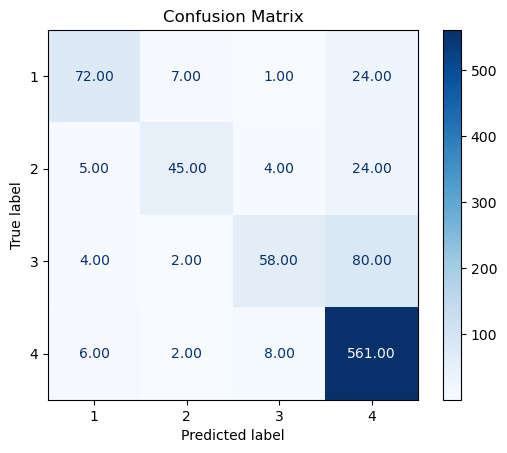

In [168]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
preds = gs_svm.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix')
plt.show()


In [170]:
X_pred = pd.Series("")

In [ ]:
gs_svm()

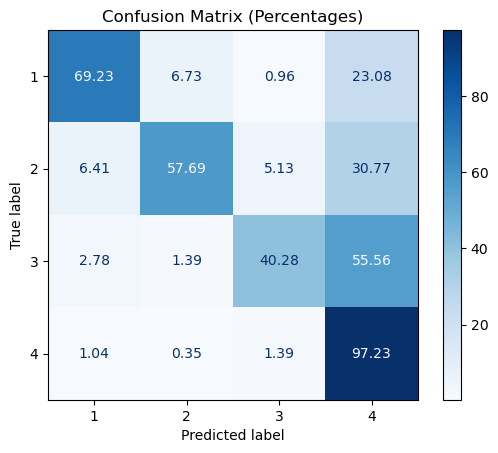

In [169]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get predictions
preds = gs_svm.predict(X_test)

# Create confusion matrix
conf_matrix = confusion_matrix(y_test, preds)

# Convert the counts to percentages
conf_matrix_percentage = conf_matrix / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

# Display the confusion matrix with percentages
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_percentage,
                              display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues, values_format='.2f')
plt.title('Confusion Matrix (Percentages)')
plt.show()


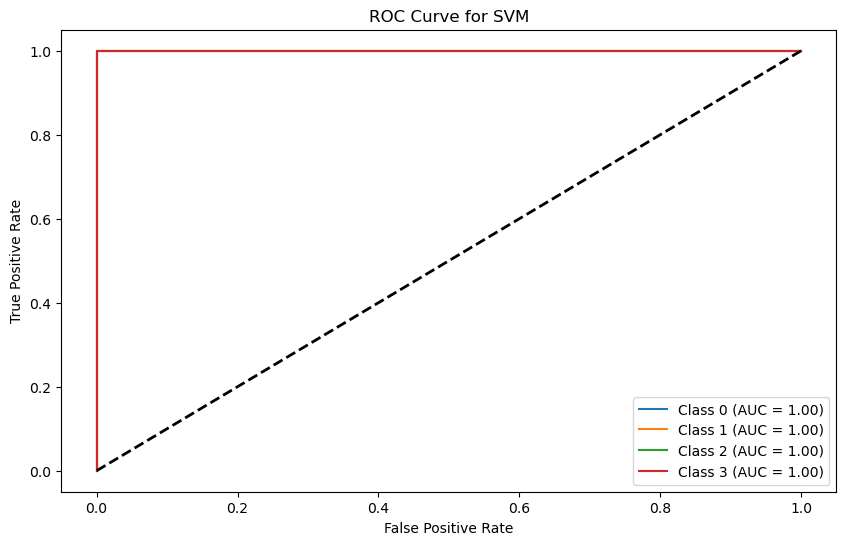

In [138]:
y_train_bin = label_binarize(y_train, classes=np.unique(y_train))

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(np.unique(y_train))):
    fpr[i], tpr[i], _ = roc_curve(y_train_bin[:, i], gs_svm.predict_proba(X_train)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve
plt.figure(figsize=(10, 6))
for i in range(len(np.unique(y_train))):
    plt.plot(fpr[i], tpr[i], label=f'Class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM')
plt.legend(loc="lower right")
plt.show()

## Random Forest

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
pipe_rf = Pipeline([
    ('cvec', CountVectorizer()),  # You can also try TfidfVectorizer here
    ('rf', RandomForestClassifier())
])

In [65]:
pipe_params_rf = {
    'cvec__max_features': [500, 1000, 2000, 3000, 4000, 5000], 
    'cvec__min_df': [2, 3],
    'cvec__max_df': [0.9, 0.95],
    'cvec__ngram_range': [(1, 1), (1, 2)],
    'rf__n_estimators': [50, 100, 200],  # You can adjust the values based on your data
    'rf__max_depth': [None, 10, 20],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__n_jobs': [-1]
}

In [66]:
gs_rf = GridSearchCV(pipe_rf, 
                     param_grid=pipe_params_rf, 
                     cv=5)

In [68]:
#gs_rf.fit(X_train, y_train)

In [ ]:
gs_rf.best_score_

In [ ]:
gs_rf.score(X_train, y_train)

In [ ]:
gs_rf.score(X_test, y_test)